In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [4]:
!pip install trl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.0/348.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
#importing the required libraries
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import LoraConfig,get_peft_model
from datasets import load_dataset
from trl import SFTTrainer, SFTConfig


In [5]:
#loading the model
model_name="meta-llama/Llama-3.2-1B-Instruct"
model=AutoModelForCausalLM.from_pretrained(model_name)
tokenizer=AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/877 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [6]:
#loading the dataset
dataset=load_dataset("MaryWambo/formatted_dataset", split="train")

def formatting_func(example):
    text = (f"<|begin_of_text|><|start_header_id|>user<|end_header_id|>\n\n"
            f"{example['input']}<|eot_id|><|start_header_id|>"
            f"assistant<|end_header_id|>\n\n{example['output']}<|eot_id|>")
    return {"text" : text}

dataset = dataset.map(formatting_func)
print(dataset[7])





formatted_dataset.json:   0%|          | 0.00/8.32M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/30431 [00:00<?, ? examples/s]

{'input': 'Irrigate if necessary.', 'output': 'Ĩtĩrĩria maĩ angĩkorũo hena bata.', 'text': '<|begin_of_text|><|start_header_id|>user<|end_header_id|>\n\nIrrigate if necessary.<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\nĨtĩrĩria maĩ angĩkorũo hena bata.<|eot_id|>'}


In [14]:
#defining the PEFT configuration(LoRA)
lora_config=LoraConfig(
    r=8,
    lora_alpha=16,
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=["q_proj", "v_proj","k_proj","gate_proj","up_proj","down_proj"]
)
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()



/usr/local/lib/python3.11/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:167: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


trainable params: 5,111,808 || all params: 1,240,926,208 || trainable%: 0.4119


In [15]:
os.environ["WANDB_MODE"] = "disabled"


In [16]:
#defining traning parameters
training_args=SFTConfig(
    output_dir="finetunned_model",
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4,
    dataset_text_field = "text",
    label_names=["labels"],
    num_train_epochs=1,
    logging_steps=1,
    max_seq_length=512,
    weight_decay=0.01,
    optim = "adamw_torch",
    warmup_steps=5,
    learning_rate=2e-4,
    lr_scheduler_type="linear",
    report_to="none",
)




In [17]:
#intializing the trainer
trainer=SFTTrainer(
    model=model,
    train_dataset=dataset,
    args=training_args,
    processing_class=tokenizer,

)

In [18]:
trainer.train()

Step,Training Loss
1,5.493300
2,5.723100
3,5.355100
4,5.809700
5,4.988300
6,5.115000
7,3.635100
8,4.306400
9,4.057600
10,4.185300


TrainOutput(global_step=3804, training_loss=1.9329064520688966, metrics={'train_runtime': 5998.9069, 'train_samples_per_second': 5.073, 'train_steps_per_second': 0.634, 'total_flos': 1.992466622908416e+16, 'train_loss': 1.9329064520688966})

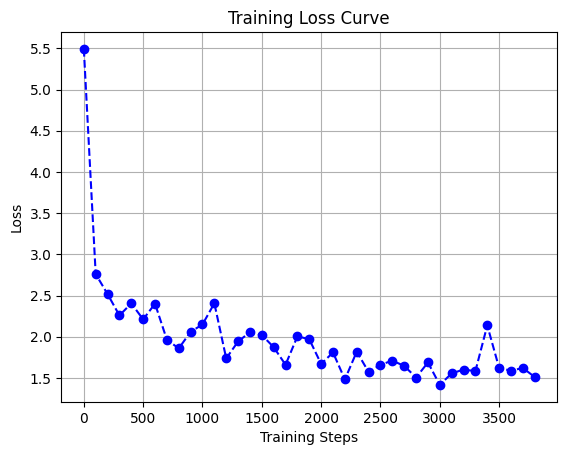

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Extracting loss and steps from trainer logs
log_history = trainer.state.log_history
steps = [entry["step"] for entry in log_history if "loss" in entry]
losses = [entry["loss"] for entry in log_history if "loss" in entry]

#saving the datapoints into a csv
df = pd.DataFrame({"Step": steps, "Loss": losses})
df.to_csv("trial_curve.csv", index=False)

#sampling the data
subsample_interval = 100
subsampled_steps = steps[::subsample_interval]
subsampled_loss = losses[::subsample_interval]
plt.plot(subsampled_steps, subsampled_loss, color='blue', marker='o', linestyle='dashed')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid()
plt.show()

In [35]:
model_name = "MaryWambo/trained_weights_llm"
model_name2="trained weights"
# Saving model locally
model.save_pretrained(model_name2)
tokenizer.save_pretrained(model_name2)
#saving the model to the hub
model.push_to_hub(model_name, token=token)
tokenizer.push_to_hub(model_name, token=token)

No files have been modified since last commit. Skipping to prevent empty commit.
No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/MaryWambo/trained_weights_llm/commit/7329dec297cbb934efc3caa633b3f135d2f6d1f3', commit_message='Upload tokenizer', commit_description='', oid='7329dec297cbb934efc3caa633b3f135d2f6d1f3', pr_url=None, repo_url=RepoUrl('https://huggingface.co/MaryWambo/trained_weights_llm', endpoint='https://huggingface.co', repo_type='model', repo_id='MaryWambo/trained_weights_llm'), pr_revision=None, pr_num=None)

In [24]:
!pip install sacrebleu

In [ ]:
import sacrebleu
generated_text = tokenizer.batch_decode(outputs, skip_special_tokens=True)[0]
reference_texts = [[""]]
bleu = sacrebleu.corpus_bleu([generated_text], reference_texts)
print(f"BLEU Score: {bleu.score}")